### The given project takes the dataset from measurements done on the Amont of Leak found in Kerosene and Water and to predict how much leakage happens given the specific values of Sensors (1,2)

### So the input parameters for the given model would be values for sensors 1 and sensor 2 to predict the Amount of Leakage in each of the three liquids

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

In [2]:
data = pd.read_excel('optical_measurements.xlsx')

In [3]:
data.head()

,SL Kerosene,SL Water,SV mm/s,SL K raw,SL W raw,SV raw,Sensor 1 [V],Sensor 2 [V],Collected 9,Collected 10,Collected 11,Y1,Y2,Threshold
0,0.605783,0.361003,0.383952,1.671151,1.246116,0.723675,4.665890,4.804329,0,0,0,1,1,4.5
1,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666546,4.804001,0,0,0,1,1,NaN
2,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666546,4.804986,0,0,0,1,1,NaN
3,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666218,4.803673,0,0,0,1,1,NaN
4,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666874,4.803345,0,0,0,1,1,NaN


In [4]:
data.shape

(205001, 14)

In [5]:
data.isnull().sum()

SL Kerosene          0
SL Water             0
SV mm/s              0
SL K raw             0
SL W raw             0
SV raw               0
Sensor 1 [V]         0
Sensor 2 [V]         0
Collected 9          0
Collected 10         0
Collected 11         0
Y1                   0
Y2                   0
Threshold       205000
dtype: int64

In [6]:
data.drop([data.columns[-1]], axis=1, inplace = True)

In [7]:
data.head()

,SL Kerosene,SL Water,SV mm/s,SL K raw,SL W raw,SV raw,Sensor 1 [V],Sensor 2 [V],Collected 9,Collected 10,Collected 11,Y1,Y2
0,0.605783,0.361003,0.383952,1.671151,1.246116,0.723675,4.665890,4.804329,0,0,0,1,1
1,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666546,4.804001,0,0,0,1,1
2,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666546,4.804986,0,0,0,1,1
3,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666218,4.803673,0,0,0,1,1
4,0.079579,0.361003,0.383952,1.671151,1.246116,0.723675,4.666874,4.803345,0,0,0,1,1


### Finding the Correlation between features

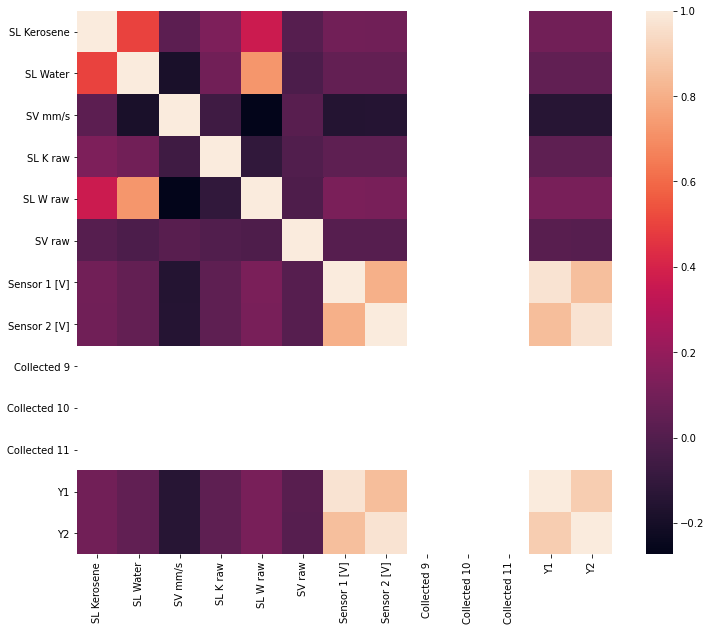

In [8]:
import seaborn as sns
fig = plt.figure(figsize = (12,10))
sns.heatmap(data.corr())

### Since we can see the columns Collected 9, collected 10 and collected 11 has no impact so we can simply drop them

### Also the columns, y1 and y2 are highly correlated with Sensors so we can remove the y1,y2

In [9]:
data.drop(['Collected 9','Collected 10', 'Collected 11', 'Y1', 'Y2'], axis=1, inplace=True)

In [10]:
X = data.drop(['SL Kerosene', 'SL Water', 'SV mm/s'], axis=1)
y = data[['SL Kerosene', 'SL Water', 'SV mm/s']]

In [11]:
data.columns

Index(['SL Kerosene', 'SL Water', 'SV mm/s', 'SL K raw', 'SL W raw', 'SV raw',
       'Sensor 1 [V]', 'Sensor 2 [V]'],
      dtype='object')

### Finding the Outliers in the given dataset

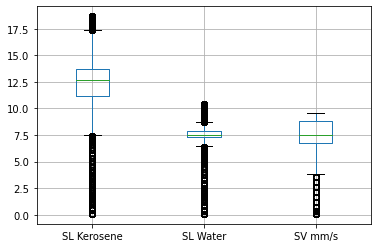

In [12]:
data[['SL Kerosene', 'SL Water', 'SV mm/s']].boxplot()

### There are frquent outliers in the dataset that can effect the accuracy of the model so we shall remove them prior to proceeding further

### Remove Outliers

In [13]:
def remove_outlier(dataframe,features):
    actual_df = dataframe
    for f in features:
        q1 = actual_df[f].quantile(0.25)
        q3 = actual_df[f].quantile(0.75)
        iqr = q3 - q1
        lower_limit = q1 - 1.5*iqr
        upper_limit = q3 + 1.5 * iqr
        outliers = dataframe[(dataframe[f] < lower_limit) | (dataframe[f] > upper_limit)].shape[0]
        dataframe = dataframe[(dataframe[f] > lower_limit) & (dataframe[f] < upper_limit)]
    return dataframe

In [14]:
data = remove_outlier(data, features = ['SL Kerosene', 'SL Water', 'SV mm/s'])

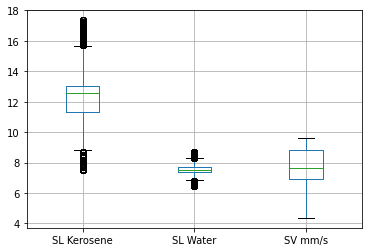

In [15]:
data[['SL Kerosene', 'SL Water', 'SV mm/s']].boxplot()

In [17]:
data = remove_outlier(data, features = ['SL Kerosene', 'SL Water', 'SV mm/s'])

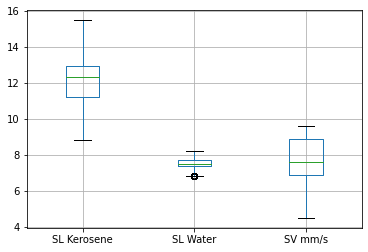

In [18]:
data[['SL Kerosene', 'SL Water', 'SV mm/s']].boxplot()

In [20]:
data = remove_outlier(data, features = ['SL Kerosene', 'SL Water', 'SV mm/s'])

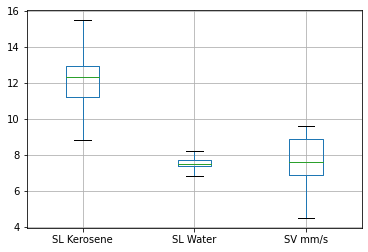

In [21]:
data[['SL Kerosene', 'SL Water', 'SV mm/s']].boxplot()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2)

In [23]:
model = RandomForestRegressor()

In [24]:
model.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [25]:
preds = model.predict(X_test)

In [26]:
score = r2_score(y_test,preds)

In [27]:
print('Accuracy score the given model {}'.format(score))

Accuracy score the given model 0.9995770983267908
